# Numerische Optimierung – Zweidimensional

In diesem Notebook beschäftigt ihr euch mit dem Lösen von von Minimierungsproblemen mit einer zweidmensionalen Zielfunktion $f: \mathbb{R}^2 \rightarrow \mathbb{R}$. Das heißt die Funktion erhält mehrere Variablen als Eingabe: $x = (x_1,x_2)$.

 
Auf diesem Arbeitsblatt sollt ihr Ansätze für die Bestimmung von Minimalpunkten für solche zweidimensionale Funktionen entwickeln und verschiedene Ansätze miteinander vergleichen. 



<div id="information" class="alert alert-success">
  <h2>Die Leitfrage dieses Arbeitsblattes lautet:</h2>
Wie lässt sich im Falle einer zweidimensionalen, differenzierbaren Zielfunktion $f: \mathbb{R}^2\rightarrow \mathbb{R}$ iterativ ein (lokales) Minimum berechnen?  Welche Aussagen über die Genauigkeit und die Kosten des Verfahrens lassen sich trefffen?
</div>


## Pakete laden

Zunächst werden einige Python-Pakete geladen. 


<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>

In [1]:
# Pakete laden
import numpy as np
import matplotlib.pyplot as plt

## Definition verschiedener Zielfunktionen

Hinweis: Um in Python auf die die erste und zweite Koordinate der Variable $x$ zuzugreifen schreibt man im Code `x[0]` (für Koordinate $x_1$) und `x[1]` (für Koordinate $x_2$).  


In [2]:
# Funktion 1 
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2 - 3*np.cos(x[1])

# Gradient von Funktion 1
def grad_f1(x):
    dfdx0 = 2 * (x[0] - 2)  # Ableitung nach x[0]
    dfdx1 = 2 * (x[1] - 5) + 3 * np.sin(x[1])  # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1])

# Funktion 2 - diese Funktion wird auch Rosenbrock Funktion genannt
a = 1 # Fester Parameter
b = 100 # Fester Parameter

def f2(x):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

# Gradient von Funktion 2
def grad_f2(x):
    dfdx0 =  2*(x[0]-a) - 4*b*x[0]*(x[1]-x[0]**2) # Ableitung nach x[0]
    dfdx1 =  2*b*(x[1]-x[0]**2) # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1]) 

# Funktion 3 
def f3(x):
    return x[0]**2 + x[1]**2

# Gradient von Funktion 3
def grad_f3(x):
    dfdx0 = 2*x[0] # Ableitung nach x[0]
    dfdx1 = 2*x[1] # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1]) 



# Wähle eine Zielfunktion und den zugehörigen Gradienten
f=f2
grad_f=grad_f2

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


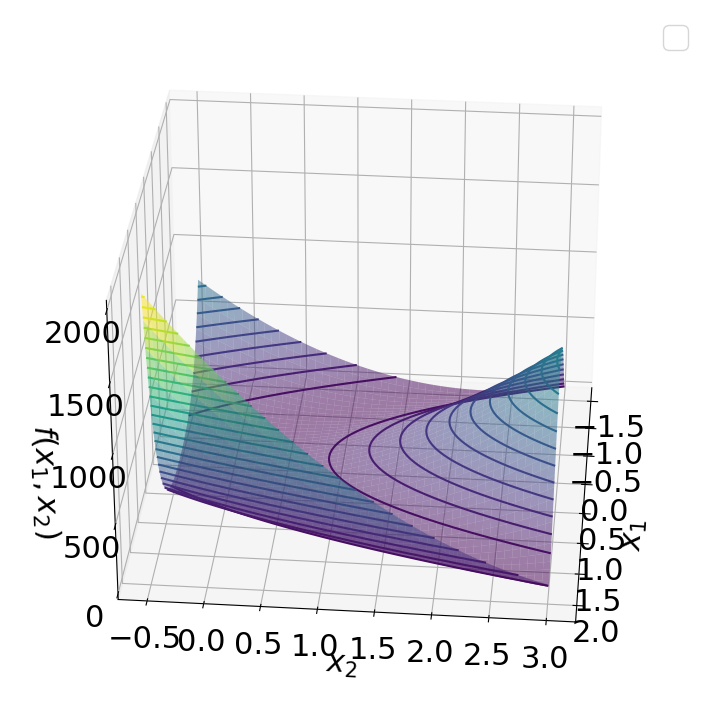

In [26]:
def plot_results(f,iterations,start_x,optimal_x,optimal_y):

    # Iterationsschritte Plotten
    x = np.linspace(-1.5, 2, 400) # für f2
    y = np.linspace(-0.5, 3, 400) # für f2
    #x = np.linspace(-1, 5, 400)  # für f1
    #y = np.linspace(0, 8.5, 400) # für f1
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])

    s1 = 22

    # Plot der Funktion
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    # Höhenlinien 
    ax.contour3D(X, Y, Z, levels=30, cmap="viridis", linestyles="solid", zorder=1) # Greys
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5,zorder=2) # Greys

    if np.any(start_x == None):
        pass
    else:
        # Plotte den Startpunkt 
        ax.plot(start_x[0], start_x[1], f(start_x), 'v', markersize=12, label='Startwert', color='dimgray',  zorder=4)

        # Plotte die Iterationen
        ax.plot(iterations[:, 0], iterations[:, 1], f(iterations.T), 'o', markersize = 8, linewidth = 2, label='Iterationsschritte',  color='black', zorder=5)

        # Plotte die berechnete Lösung 
        ax.plot(optimal_x[0], optimal_x[1], f(optimal_x), 'D', markersize=12, label='Berechnete Lösung', color='dimgray',zorder=5)

    # Achsenbeschriftungen
    ax.set_xlabel(r'$x_1$', fontsize=s1, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=s1, labelpad=5)
    ax.set_zlabel(r'$f(x_1, x_2)$', fontsize=s1, labelpad=12)
    ax.zaxis.label.set_rotation(0)  
    ax.zaxis.set_label_coords(-0.1, 0.5)  

    ax.view_init(elev=30, azim=5)


    # Skalenwerte auf Achsen vergrößern
    plt.xticks(fontsize=s1)
    plt.yticks(fontsize=s1)
    ax.zaxis.set_tick_params(labelsize=s1)  
    plt.legend( prop={'size': s1}) # loc='upper right',

    # plt.savefig('../3d_gradientenverfahren.png', dpi=300, bbox_inches='tight')# pad_inches=3.82)
    return plt.show()

plot_results(f, None, None, None, None)



<div id="exercise" class="alert alert-info">
    <h3> Aufgabe </h3>
    Wie lässt sich ausgehend von einem beliebigen Punkt auf dem Funktionsgraphen schrittweise ein Minimalpunkt der Funktion finden? Notiere die Schritte deines Verfahrens. 
</div>


<div id="exercise" class="alert alert-info">
    <h3> Zusatzaufgabe </h3>
    In folgendem Codefeld kannst du dein Verfahren selbst umsetzen. Ein grobes Codegerüst ist bereits gegeben.
</div>

In [27]:
# Startpunkt
start_x = np.array([2, -0.5])

# Schrittweite
stepsize = 0.01

# Maximale Anzahl Iterationen
num_steps = 1000

def mein_verfahren(f, start_x, stepsize, num_steps):
    # Lege den Startwert als ersten Iterationsschritt fest
    x = start_x
    
    # Liste  zum Speichern aller Iterationsschritte 
    iterations = [x]

    # Implementiere hier die Schritte deines Algorithmus
    for i in range(num_steps):
        iterations.append(x)
        
        x_new = [0,0] #  Ersetze den Ausdruck "[0,0]" durch deine Iterationsvorschrift
        
    
        iterations.append(x_new)
        x = x_new
        
    
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    
    return x, f(x), np.array(iterations),

# Verfahren durchführen
optimal_x, optimal_y, iterations = mein_verfahren(f, start_x, stepsize, num_steps)

Optimales x: [0 0]
Minimalwert von f(x): 1


.

.

.

.

# Vergleiche verschiedene numerische Optimierungsverfahren

Im Folgenden sind drei numerische Optimierungsverfahren implementiert. Diese können zum Lösen von Minimierungsproblemen
mit einer Zielfunktion $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ eingesetzt werden. Das heißt die Funktion erhält mehrere Variablen als Eingabe: $x = (x_1,x_2)$.


Bei allen drei Verfahren wird ausgehend von einem Startpunkt iterativ, d.h. schrittweise, eine Lösungs berechnet.
In diesem Notebook könnt ihr den Starpunkt und die Schrittweite variieren und untersuchen wie nah die berechnete Lösung an dem tatsächlichen globalen Minimalpunkt liegt. 

Überlegt zudem, wie hoch der Rechenaufwand der einzelnen Verfahren ist. Dazu könnt ihr beispielsweise die Anzahl der Funktionsauswertungen pro Iterationsschritt vergleichen. 

 
## Das alternierende Bergsteigerverfahren  <i class="fa fa-mountain"></i>
Beim alternierenden Bergsteigerverfahrens werden abwechselnd die Werte der $x_1$$- und $x_2$-Koordinaten festgehalten und dann das Bergsteigerverfahren für die variable Koordinate angewendet.



## Das Bergsteigerverfahren mit acht Suchrichtungen <i class="fa fa-mountain"></i>

Bei diesem Verfahren werden der Funktionswert an der aktuellen Iterierten $x^{(k)}= (x_1,x_2)$ mit den Funktionswerten der folgenden acht Kandidaten verglichen: 

* 4 Kandidaten in Richtung der Koordinatenachsen: $(x_1+\alpha, x_2), (x_1-\alpha, x_2), (x_1, x_2+\alpha), (x_1, x_2-\alpha)$ 
* 4 Kandidaten in Richtung der Diagonalen: $(x_1+\frac{\alpha}{\sqrt{2}}, x_2+\frac{\alpha}{\sqrt{2}}), (x_1+\frac{\alpha}{\sqrt{2}}, x_2-\frac{\alpha}{\sqrt{2}}), (x_1-\frac{\alpha}{\sqrt{2}}, x_2+\frac{\alpha}{\sqrt{2}}), (x_1-\frac{\alpha}{\sqrt{2}}, x_2-\frac{\alpha}{\sqrt{2}})$

Die nachfolgende Iterierte $x^{(k+1)}$ wird dann auf den Wert gesetzt, der zu der größten Verbesserung des Funktionswertes im Vergleich zu $f(x^{(k)})$ geführt hat.

## Das Gradientenverfahren

**Beispiel:**
Die  "Ableitung" einer Funktion $f$, die von zwei Variablen $x_1$ und $x_2$ abhängt, setzt sich aus zwei Teilableitungen zusammen. 

$$f'(x_1, x_2) = \pmatrix{ \text{Ableitung nach} \; x_1 \\ \text{Ableitung nach} \; x_2} $$


<div id="information" class="alert alert-success">
  <h2><i class="fas fa-info" style="font-size:36px"></i> &nbsp;  Der Gradient</h2>
    
* Die Ableitung einer Funktion, die von mehreren Variablen abhängt, wird Gradient genannt. Statt $f'$ schreibt man $\nabla f$.
* Die "Teilableitungen" werden partielle Ableitungen genannt. Sie werden in der Regel als Einträge eines Vektors untereinander notiert.

</div>


Die Iterationsvorschrift des Gradientenabstiegsverfahrens lautet:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot \nabla f(x^{(k)} )$ 

## Startwert und eine Schrittweite

<div id="exercise" class="alert alert-info">
    Wähle einen Startpunkt und eine Schrittweite. Lege zudem fest nach wie vielen Iterationen das Verfahren beendet werden soll. <br>
    Führe den Code aus.
</div>


In [28]:
# Startpunkt
start_x = np.array([2, -0.5])

# Schrittweite
stepsize = 0.01

# Maximale Anzahl Iterationen
num_steps = 1000

# Das alternierende Bergsteigerverfahren 

In diesem Codefeld wird das alternierende Bergsteigerverfahren implementiert und zur Minimierung unserer Zielfunktion angewendet. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

In [29]:
def bergsteigerverfahren_2d(f, start_x, stepsize, num_steps, tol=1e-6):

    x = np.array(start_x, dtype=float)  
    iterations = [x]

    for i in range(num_steps):
        improved = False

        # Optimierung in x1-Richtung
        neighbors_x1 = [
            x + np.array([-stepsize, 0]),
            x + np.array([stepsize, 0])
        ]
        best_x1 = min(neighbors_x1, key=lambda x: f(x))
        
        if np.linalg.norm(best_x1-x) < tol:
            break
            
        if np.linalg.norm(f(best_x1) - f(x)) < tol:
            break
            
        if f(best_x1) < f(x):
            x = best_x1
            improved = True

        # Optimierung in x2-Richtung
        neighbors_x2 = [
            x + np.array([0, -stepsize]),
            x + np.array([0, stepsize])
        ]
        best_x2 = min(neighbors_x2, key=lambda x: f(x))
             
        if np.linalg.norm(best_x2-x) < tol:
            break
            
        if np.linalg.norm(f(best_x2) - f(x)) < tol:
            break    
        
        if f(best_x2) < f(x):
            x = best_x2
            improved = True

        if not improved:
            break
            
        iterations.append(x)
        
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    
    return x, f(x), np.array(iterations)

optimal_x, optimal_y, iterations = bergsteigerverfahren_2d(f, start_x, stepsize, num_steps)

Optimales x: [0.82 0.67]
Minimalwert von f(x): 0.033


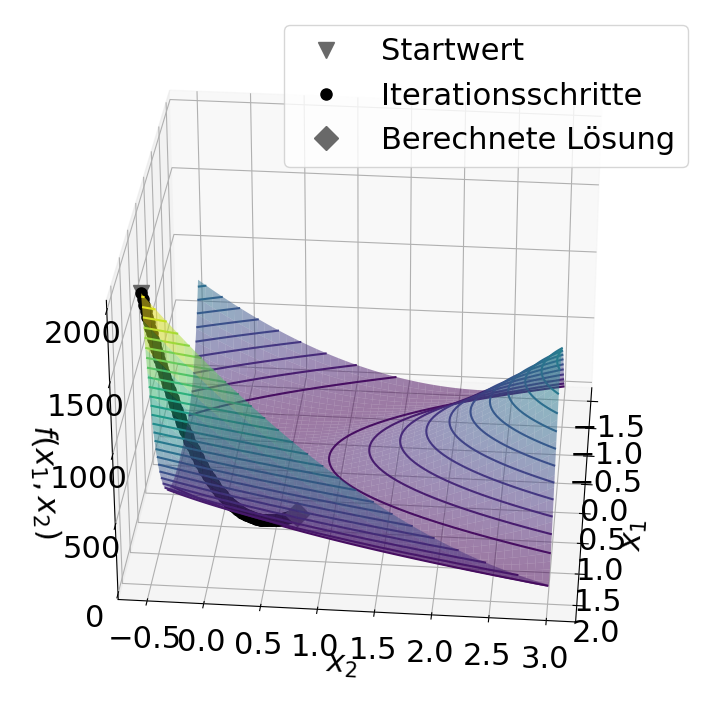

In [30]:
plot_results(f,iterations,start_x,optimal_x,optimal_y)

## Das Bergsteigerverfahren mit acht Suchrichtungen 

In diesem Codefeld wird das  Bergsteigerverfahren mit 8 Suchrichtungen implementiert und zur Minimierung unserer Zielfunktion angewendet. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

In [31]:
def bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps, tol=1e-6):

    x = np.array(start_x, dtype=float)
    x_history = [x.copy()]
    iterations = [x]

    for i in range(num_steps):
        
        # Definieren aller möglichen Richtungen
        dirs = [
            np.array([stepsize, 0]),    # Rechts
            np.array([-stepsize, 0]),   # Links
            np.array([0, stepsize]),    # Oben
            np.array([0, -stepsize]),   # Unten
            np.array([stepsize/np.sqrt(2), stepsize/np.sqrt(2)]),   # Diagonal rechts oben
            np.array([stepsize/np.sqrt(2), -stepsize/np.sqrt(2)]),  # Diagonal rechts unten
            np.array([-stepsize/np.sqrt(2), stepsize/np.sqrt(2)]),  # Diagonal links oben
            np.array([-stepsize/np.sqrt(2), -stepsize/np.sqrt(2)])  # Diagonal links unten
        ]
        
        # Generiere alle Kandidatenpunkte
        candidates = [x + direction for direction in dirs] + [x.copy()]
        
        # Finde den Punkt mit dem kleinsten Funktionswert
        best_candidate = min(candidates, key=lambda p: f(p))
        
        # Abbruchbedingung bei fehlender Verbesserung
        if f(best_candidate) >= f(x):
            break
            
        if np.linalg.norm(best_candidate-x) < tol:
            break
            
        if np.linalg.norm(f(best_candidate) - f(x)) < tol:
            break
            
        x = best_candidate
        iterations.append(x.copy())
        
    # Ausgabe der Ergebnisse
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(iterations)-1)  # -1 wegen Startpunkt
    
    return x, f(x), np.array(iterations)

In [32]:
optimal_x, optimal_y, iterations = bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps)

Optimales x: [0.7575 0.5699]
Minimalwert von f(x): 0.0603
Anzahl Iterationsschritte: 227


### Grafische Darstellung  
<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

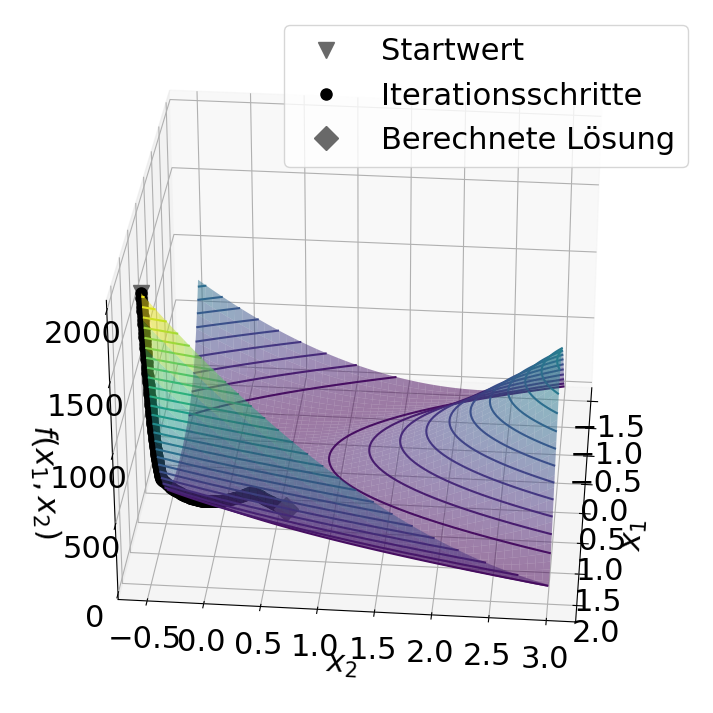

In [33]:
plot_results(f,iterations,start_x,optimal_x,optimal_y)

## Das Gradientenverfahren

In diesem Codefeld wird das Gradientenverfahren implementiert. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 
Falls es zu einer Fehlermeldung kommt, wähle eine kleinere Schrittweite (z.B. 0.0001)

<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

In [18]:
# Definiere das Gradientenverfahren

stepsize = 0.0001

def gradient_descent(f, grad_f, start_x, stepsize, num_steps, tol=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f(x)
        x_new = x - stepsize * grad
        
        iterations.append(x_new)
        
        # Abbruchbedingung, wenn die Änderung klein ist
        if np.linalg.norm(x_new - x) < tol:
            break
        
        if np.linalg.norm(f(x_new) - f(x)) < tol:
            break
        
        x = x_new
        
    
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   
    
    len(iterations)
    return np.array(iterations), x, f(x)

# Gradientenabstieg durchführen
iterations, optimal_x, optimal_y = gradient_descent(f, grad_f, start_x, stepsize, num_steps)

Optimales x: [0.5116 0.2593]
Minimalwert von f(x): 0.2391
Anzahl Iterationsschritte: 1001


### Grafische Darstellung  
<div id="exercise" class="alert alert-info">
    Führe den Code aus.
</div>

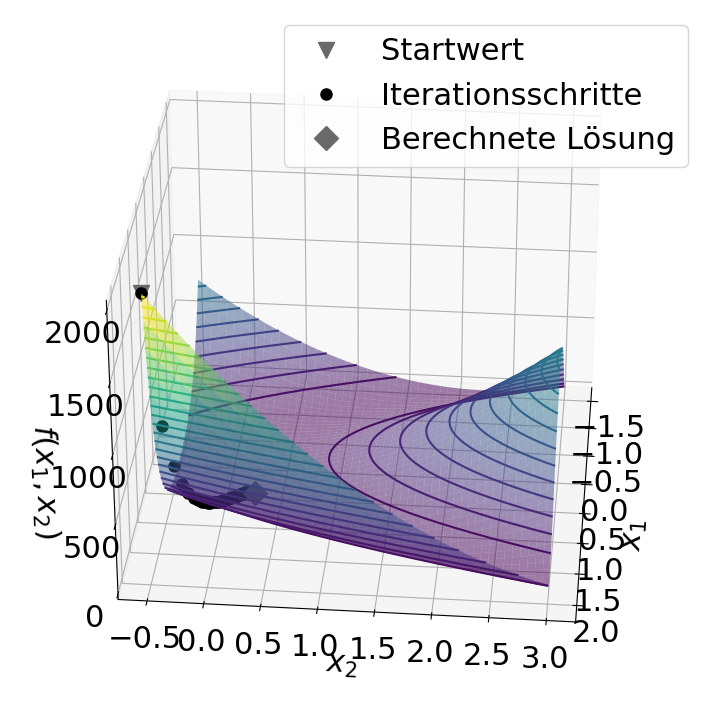

In [19]:
plot_results(f,iterations,start_x,optimal_x,optimal_y)